In [57]:
BASE_DIR = '../'*3
MODEL_DIR = BASE_DIR +'code/CNN/cnn_basic/cnn_basic_model.ipynb'
FLW_DIR = BASE_DIR + 'code/UTIL/dataset/flower_prepro.ipynb'
OFFICE_DIR = BASE_DIR +'code/UTIL/dataset/office31_prepro.ipynb'
%run {MODEL_DIR}
%run {FLW_DIR}
%run {OFFICE_DIR}

Using device: cpu
Using PyTorch version: 1.9.0
Using device: cpu
Using PyTorch version: 1.9.0


In [46]:
EPOCH = 10
BATCH_SIZE=30
NUM_WORKERS=0
LEARNING_RATE = 0.00005

In [47]:
fd = FlowersDataset([96, 96], [96, 96, 3])
print(fd)

flowers(select, 3450+652+215)


(3, 96, 96)
[[Linear(in_features=27648, out_features=30, bias=True)], [Linear(in_features=30, out_features=10, bias=True)], [Flatten(start_dim=1, end_dim=-1)], [Linear(in_features=10, out_features=5, bias=True)]]
Model flowers_model_1 train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Linear(in_features=27648, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=10, bias=True)
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=10, out_features=5, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 5e-05
    weight_decay: 0
)
    Epoch 1: cost=53.740, accuracy=0.284/0.270 (2/2 secs)
    Epoch 1: cost=37.312, accuracy=0.325/0.340 (1/3 secs)
    Epoch 2: cost=21.717, accuracy=0.389/0.260 (2/5 secs)
    Epoch 2: cost=20.988, accuracy=0.387/0.400 (2/7 secs)
    Epoch 3: cost=13.271, accuracy=0.417/0.3

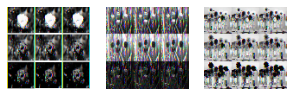

추정확률분포 [ 0, 0,100, 0, 0] => 추정 rose : 정답 rose => O
추정확률분포 [ 0,95, 0, 5, 0] => 추정 dandelion : 정답 tulip => X
추정확률분포 [ 0,16,71,13, 0] => 추정 rose : 정답 sunflower => X


In [29]:
#SGD
fm = CnnBasicModel('flowers_model_1', fd, [['full',{'width':30}],
                                           ['full',{'width':10}]])
fm.exec_all(epoch_count=EPOCH, report=40, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )

In [39]:
#SGD
fm = CnnBasicModel('flowers_model_1', fd, [['conv', {'ksize':2, 'chn':6}], 
                ['max', {'stride':2}], 
                ])
fm.exec_all(epoch_count=EPOCH, report=40, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )


(3, 96, 96)
[[Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1)), ReLU()], [MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)], [Flatten(start_dim=1, end_dim=-1)], [Linear(in_features=13824, out_features=5, bias=True)]]
Model flowers_model_1 train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Flatten(start_dim=1, end_dim=-1)
    (4): Linear(in_features=13824, out_features=5, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 5e-05
    weight_decay: 0
)
    Epoch 1: cost=5.851, accuracy=0.243/0.210 (4/4 secs)
    Epoch 1: cost=5.137, accuracy=0.250/0.360 (3/7 secs)
    Epoch 2: cost=3.319, accuracy=0.312/0.29

KeyboardInterrupt: 

(3, 96, 96)
[[Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1)), ReLU()], [MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)], [Conv2d(6, 12, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1)), ReLU()], [AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)], [Flatten(start_dim=1, end_dim=-1)], [Linear(in_features=6912, out_features=5, bias=True)]]
Model flowers_model_1 train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=6912, out_features=5, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!

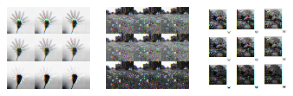

추정확률분포 [ 2,46, 0,51, 0] => 추정 sunflower : 정답 daisy => X
추정확률분포 [ 8,47, 0,45, 1] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [ 0, 0, 0,99, 1] => 추정 sunflower : 정답 tulip => X


In [55]:
#SGD
fm = CnnBasicModel('flowers_model_1', fd, [['conv', {'ksize':2, 'chn':6,'actfunc':'relu'}], 
                ['max', {'stride':2}],
                                           ['conv', {'ksize':2, 'chn':12,'actfunc':'relu'}], 
                ['avg', {'stride':2}]
                ])
fm.exec_all(epoch_count=EPOCH, report=40, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )


(3, 96, 96)
Model flowers_model_3 train started 


!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(4, 4), stride=(4, 4), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1728, out_features=5, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 5e-05
    weight_decay: 0
)
    Epoch 1: cost=8.443, accuracy=0.197/0.140 (5/5 secs)
    Epoch 1: cost=6.659, accuracy=0.212/0.200 (4/9 secs)
    Epoch 2: cost=3.308, accuracy=0.278/0.260 (8/17 secs)
    Epoch 2: cost=3.069, accuracy=0.290/0.310 (5/22 secs)
    Epoch 3: cost=2.317, accuracy=

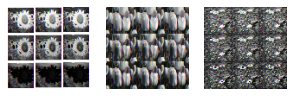

추정확률분포 [ 2, 1, 0,89, 8] => 추정 sunflower : 정답 sunflower => O
추정확률분포 [ 4, 8,37, 1,51] => 추정 tulip : 정답 tulip => O
추정확률분포 [14,14,46, 3,23] => 추정 rose : 정답 daisy => X


In [58]:
fm3 = CnnBasicModel('flowers_model_3', fd, 
               [['conv', {'ksize':5, 'chn':6,'actfunc':'relu'}], 
                ['max', {'stride':4}], 
                ['conv', {'ksize':3, 'chn':12,'actfunc':'relu'}], 
                ['avg', {'stride':2}]])
fm3.exec_all(epoch_count=EPOCH, report=40, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )